In [1]:
#imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st
from pymongo.mongo_client import MongoClient
import tqdm as tqdm

# Read Data

In [98]:

data = pd.read_csv("final_data.csv")

# Demographic Analysis

               age      gender     english country
count   300.000000  300.000000  300.000000     300
unique         NaN         NaN         NaN      20
top            NaN         NaN         NaN     USA
freq           NaN         NaN         NaN     143
mean     38.706667    1.500000    6.920000     NaN
std      11.627178    0.500835    0.366124     NaN
min      20.000000    1.000000    4.000000     NaN
25%      30.000000    1.000000    7.000000     NaN
50%      36.500000    1.500000    7.000000     NaN
75%      47.000000    2.000000    7.000000     NaN
max      70.000000    2.000000    7.000000     NaN


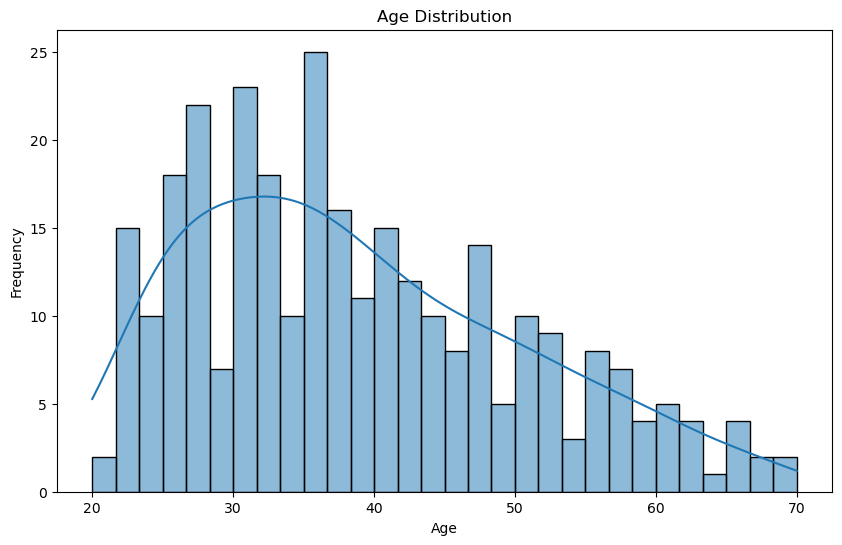

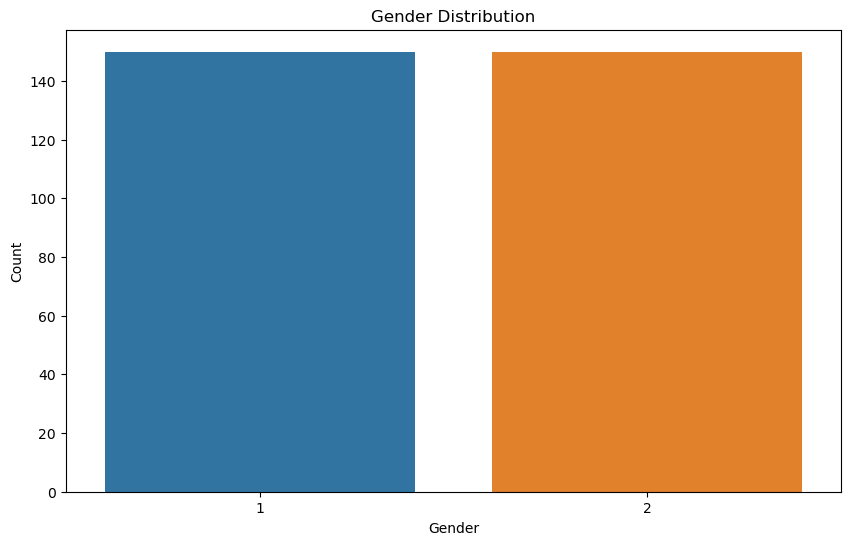

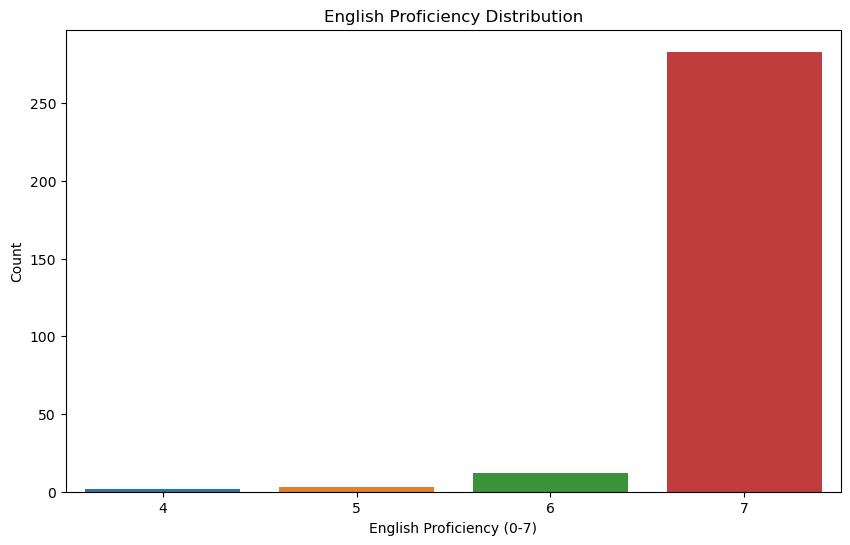

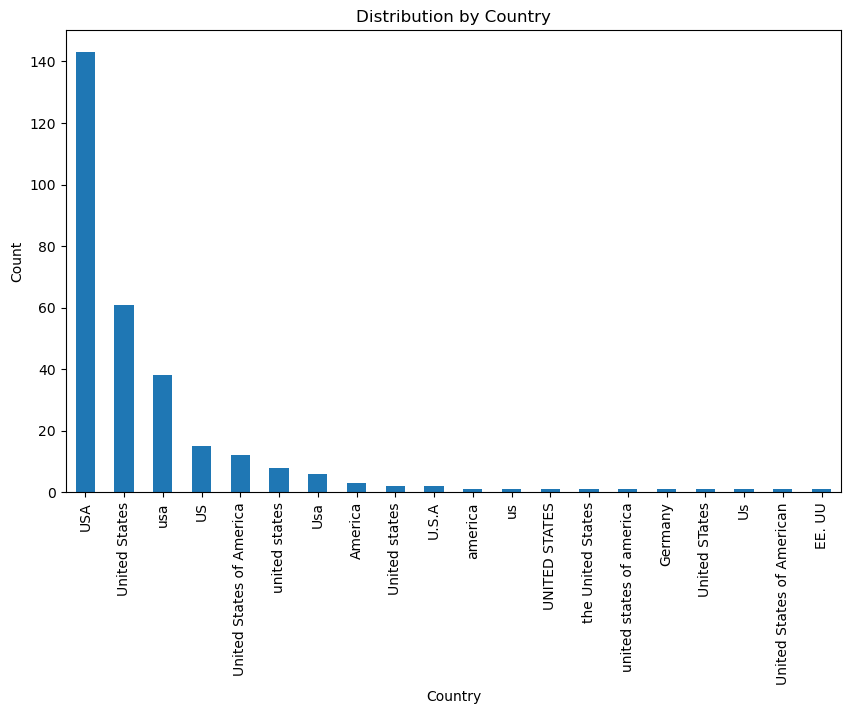

In [100]:
#Demographic Analysis
demographics_data = ntlx3_data = data.iloc[:, data.columns.get_loc('serious') + 19 :]

# Basic statistics
print(pd.DataFrame(demographics_data.describe(include='all')))

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(demographics_data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=demographics_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# English proficiency distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='english', data=demographics_data)
plt.title('English Proficiency Distribution')
plt.xlabel('English Proficiency (0-7)')
plt.ylabel('Count')
plt.show()

# Distribution by country
plt.figure(figsize=(10, 6))
demographics_data['country'].value_counts().plot(kind='bar')
plt.title('Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


# Status Quo Bias Analysis

## Data to Descriptives

In [101]:
# Extract Relavent data for each scenarios 
sc1_data = data.iloc[:, data.columns.get_loc('chat3') + 1 : data.columns.get_loc('chat3') + 5]
sc2_data = data.iloc[:, data.columns.get_loc('chat3') + 5 : data.columns.get_loc('chat3') + 9]
sc3_data = data.iloc[:, data.columns.get_loc('chat3') + 9 : data.columns.get_loc('chat3') + 13]

In [102]:
# Very important Manipulation-Must be reported - The alternative choosen should be mapped to a condition.
# The alternative selected should be mapped to a condition. For instance, while presenting the alternative
# the first alternative is always the status quo alternative for all conditions. Therefore, for 
# SQB2 the selection of status quo alternative is 'a' and Non Status quo alternative is any other alternative 
# other than 'a'. This 'a' must be replaced with 'b' and 'b' with 'a' to map the status quo selection with condition.
# this snippet of code achives this goal.


condition = (sc1_data['sc1_cond'] == 'SQB2') & (sc1_data['sc1_choice'] == 'a')
# Update the 'age' column for these records
sc1_data.loc[condition, 'sc1_choice'] = 'temp'

condition = (sc1_data['sc1_cond'] == 'SQB2') & (sc1_data['sc1_choice'] == 'b')
# Update the 'age' column for these records
sc1_data.loc[condition, 'sc1_choice'] = 'a'

condition = (sc1_data['sc1_cond'] == 'SQB2') & (sc1_data['sc1_choice'] == 'temp')
# Update the 'age' column for these records
sc1_data.loc[condition, 'sc1_choice'] = 'b'


condition = (sc1_data['sc1_cond'] == 'SQB3') & (sc1_data['sc1_choice'] == 'a')
# Update the 'age' column for these records
sc1_data.loc[condition, 'sc1_choice'] = 'temp'

condition = (sc1_data['sc1_cond'] == 'SQB3') & (sc1_data['sc1_choice'] == 'c')
# Update the 'age' column for these records
sc1_data.loc[condition, 'sc1_choice'] = 'a'

condition = (sc1_data['sc1_cond'] == 'SQB3') & (sc1_data['sc1_choice'] == 'temp')
# Update the 'age' column for these records
sc1_data.loc[condition, 'sc1_choice'] = 'c'


condition = (sc1_data['sc1_cond'] == 'SQB4') & (sc1_data['sc1_choice'] == 'a')
# Update the 'age' column for these records
sc1_data.loc[condition, 'sc1_choice'] = 'temp'

condition = (sc1_data['sc1_cond'] == 'SQB4') & (sc1_data['sc1_choice'] == 'd')
# Update the 'age' column for these records
sc1_data.loc[condition, 'sc1_choice'] = 'a'

condition = (sc1_data['sc1_cond'] == 'SQB4') & (sc1_data['sc1_choice'] == 'temp')
# Update the 'age' column for these records
sc1_data.loc[condition, 'sc1_choice'] = 'd'





condition = (sc2_data['sc2_cond'] == 'SQB2') & (sc2_data['sc2_choice'] == 'a')
# Update the 'age' column for these records
sc2_data.loc[condition, 'sc2_choice'] = 'temp'

condition = (sc2_data['sc2_cond'] == 'SQB2') & (sc2_data['sc2_choice'] == 'b')
# Update the 'age' column for these records
sc2_data.loc[condition, 'sc2_choice'] = 'a'

condition = (sc2_data['sc2_cond'] == 'SQB2') & (sc2_data['sc2_choice'] == 'temp')
# Update the 'age' column for these records
sc2_data.loc[condition, 'sc2_choice'] = 'b'


condition = (sc2_data['sc2_cond'] == 'SQB3') & (sc2_data['sc2_choice'] == 'a')
# Update the 'age' column for these records
sc2_data.loc[condition, 'sc2_choice'] = 'temp'

condition = (sc2_data['sc2_cond'] == 'SQB3') & (sc2_data['sc2_choice'] == 'c')
# Update the 'age' column for these records
sc2_data.loc[condition, 'sc2_choice'] = 'a'

condition = (sc2_data['sc2_cond'] == 'SQB3') & (sc2_data['sc2_choice'] == 'temp')
# Update the 'age' column for these records
sc2_data.loc[condition, 'sc2_choice'] = 'c'


condition = (sc2_data['sc2_cond'] == 'SQB4') & (sc2_data['sc2_choice'] == 'a')
# Update the 'age' column for these records
sc2_data.loc[condition, 'sc2_choice'] = 'temp'

condition = (sc2_data['sc2_cond'] == 'SQB4') & (sc2_data['sc2_choice'] == 'd')
# Update the 'age' column for these records
sc2_data.loc[condition, 'sc2_choice'] = 'a'

condition = (sc2_data['sc2_cond'] == 'SQB4') & (sc2_data['sc2_choice'] == 'temp')
# Update the 'age' column for these records
sc2_data.loc[condition, 'sc2_choice'] = 'd'




condition = (sc3_data['sc3_cond'] == 'SQB2') & (sc3_data['sc3_choice'] == 'a')
# Update the 'age' column for these records
sc3_data.loc[condition, 'sc3_choice'] = 'temp'

condition = (sc3_data['sc3_cond'] == 'SQB2') & (sc3_data['sc3_choice'] == 'b')
# Update the 'age' column for these records
sc3_data.loc[condition, 'sc3_choice'] = 'a'

condition = (sc3_data['sc3_cond'] == 'SQB2') & (sc3_data['sc3_choice'] == 'temp')
# Update the 'age' column for these records
sc3_data.loc[condition, 'sc3_choice'] = 'b'


condition = (sc3_data['sc3_cond'] == 'SQB3') & (sc3_data['sc3_choice'] == 'a')
# Update the 'age' column for these records
sc3_data.loc[condition, 'sc3_choice'] = 'temp'

condition = (sc3_data['sc3_cond'] == 'SQB3') & (sc3_data['sc3_choice'] == 'c')
# Update the 'age' column for these records
sc3_data.loc[condition, 'sc3_choice'] = 'a'

condition = (sc3_data['sc3_cond'] == 'SQB3') & (sc3_data['sc3_choice'] == 'temp')
# Update the 'age' column for these records
sc3_data.loc[condition, 'sc3_choice'] = 'c'


condition = (sc3_data['sc3_cond'] == 'SQB4') & (sc3_data['sc3_choice'] == 'a')
# Update the 'age' column for these records
sc3_data.loc[condition, 'sc3_choice'] = 'temp'

condition = (sc3_data['sc3_cond'] == 'SQB4') & (sc3_data['sc3_choice'] == 'd')
# Update the 'age' column for these records
sc3_data.loc[condition, 'sc3_choice'] = 'a'

condition = (sc3_data['sc3_cond'] == 'SQB4') & (sc3_data['sc3_choice'] == 'temp')
# Update the 'age' column for these records
sc3_data.loc[condition, 'sc3_choice'] = 'd'




In [6]:
# related functions
def analyse(data, sqb_condition = "NEUT", scenario = "BA"):

    if scenario == 'BA':
        var1 = 'sc1_cond'
        var2 = 'sc1_choice'
    if scenario == 'IP':
        var1 = 'sc2_cond'
        var2 = 'sc2_choice'
    if scenario == 'CJ':
        var1 = 'sc3_cond'
        var2 = 'sc3_choice'       

    if sqb_condition == "SQB1":
        alt = 'a'
    if sqb_condition == "SQB2":
        alt = 'b'
    if sqb_condition == "SQB3":
        alt = 'c'
    if sqb_condition == "SQB4":
        alt = 'd'

    data_a = data[data[var1] == sqb_condition]
    sq_total = len(data_a)
    data_b = data_a[data_a[var2] == alt]
    sq_chosen = len(data_b)

    data_a = data[data[var1] == "NEUT"]
    n_total = len(data_a)
    data_b = data_a[data_a[var2] == alt]
    n_chosen = len(data_b)

    data_a = data[(data[var1] != sqb_condition) & (data[var1] != "NEUT")] 
    nsq_total = len(data_a)
    data_b = data_a[data_a[var2] == alt]
    nsq_chosen = len(data_b)


    return [sq_chosen, sq_total, round(sq_chosen/sq_total, 2), 
            n_chosen, n_total, round(n_chosen/n_total, 2), 
            nsq_chosen, nsq_total, round(nsq_chosen/nsq_total,2)]

In [103]:
# Data to Descriptives
scenarios = ['BA', 'IP', 'CJ']
conditions = ['NEUT', 'SQB1', 'SQB2', 'SQB3', 'SQB4']

descriptive_data = []
for sc in scenarios:
    if sc == 'BA':
        data = sc1_data
    if sc == 'IP':
        data = sc2_data
    if sc == 'CJ':
        data = sc3_data
    
    for cond in conditions[1:]:
        descriptive_data.append([sc, cond]+analyse(data, sqb_condition= cond, scenario = sc))

descriptives = pd.DataFrame(descriptive_data, 
                            columns = ['scenario', 'alternative', 'sq_chosen', 'sq_total', 
                                       'sq_prop', 'n_chosen', 'n_total', 'n_prop', 'nsq_chosen',
                                         'nsq_total', 'nsq_prop'])

## Baseline

In [90]:
#load data baseline data
descriptives1988 = pd.read_csv("descriptives1988.csv")
descriptives2021 = pd.read_csv("descriptives2021.csv")

import importlib
importlib.reload(metrics)

def compare_metrics(col1, col2, col3, col4):

    chisq = []
    p = []
    or_ = []
    or_lower = []
    or_upper = [] 	
    h = [] 	
    h_lower = []
    h_upper = []

    for i in range(0, len(col1)):
        data = np.array([[col1[i], col3[i]],
                        [col2[i] - col1[i], col4[i] - col3[i]]])
        chi_squared = metrics.chi_squared_test(data)
        chisq.append(chi_squared['chi-squared statistic'])
        p.append(chi_squared['p-value'])

        fisher_exact = metrics.fisher_exact_test(data)
        or_.append(fisher_exact['odds_ratio'])
        or_lower.append(fisher_exact['ci_95'][0])
        or_upper.append(fisher_exact['ci_95'][1])
        

        cohens_h = metrics.cohens_h(col1[i], col3[i],
                                        col2[i] , col4[i])
        h.append(cohens_h['h'])
        h_lower.append(cohens_h['h_low'])
        h_upper.append(cohens_h['h_upp'])

    df = pd.DataFrame([chisq, p, or_, or_lower, or_upper, h, h_lower, h_upper]).T
    df.columns = ["chisq", "p", "or", "or_lower", "or_upper", "h", "h_lower", "h_upper"]
    return df


### SQ-NSQ 1988

In [91]:

compare_metrics(descriptives1988['sq_chosen'], descriptives1988['sq_total'], 
                descriptives1988['nsq_chosen'], descriptives1988['nsq_total'])

,chisq,p,or,or_lower,or_upper,h,h_lower,h_upper
0,18.45,0.001,5.60,2.47,12.73,0.78,0.42,1.14
1,6.11,0.013,3.06,1.23,7.59,0.54,0.10,0.99
2,15.37,0.001,8.50,2.54,28.40,0.79,0.30,1.28
3,0.92,0.338,1.51,0.65,3.48,0.18,-0.20,0.57
4,0.69,0.406,1.56,0.55,4.44,0.21,-0.30,0.71
5,0.58,0.448,1.46,0.55,3.86,0.16,-0.26,0.58
6,2.36,0.125,2.03,0.81,5.06,0.29,-0.09,0.67
7,5.96,0.015,3.46,1.23,9.71,0.57,0.08,1.07
8,0.97,0.325,1.69,0.59,4.84,0.17,-0.17,0.51
9,0.35,0.554,1.52,0.38,6.06,0.12,-0.31,0.56


### SQ-N 1988

In [92]:

compare_metrics(descriptives1988['sq_chosen'], descriptives1988['sq_total'], 
                descriptives1988['n_chosen'], descriptives1988['n_total'])

,chisq,p,or,or_lower,or_upper,h,h_lower,h_upper
0,8.67,0.003,5.00,1.63,15.34,0.74,0.27,1.21
1,1.15,0.283,1.83,0.61,5.51,0.30,-0.25,0.84
2,1.34,0.246,2.14,0.58,7.83,0.34,-0.24,0.92
3,0.96,0.326,1.76,0.57,5.48,0.25,-0.24,0.74
4,0.22,0.639,1.34,0.39,4.62,0.14,-0.45,0.73
5,0.77,0.381,1.75,0.49,6.20,0.23,-0.29,0.75
6,1.13,0.288,1.87,0.58,5.97,0.26,-0.21,0.73
7,1.11,0.292,1.90,0.57,6.31,0.31,-0.27,0.90
8,1.86,0.172,2.53,0.64,9.94,0.28,-0.11,0.66
9,2.94,0.086,6.14,0.60,62.44,0.41,-0.08,0.90


### SQ-NSQ 2021

In [93]:

compare_metrics(descriptives2021['sq_chosen'], descriptives2021['sq_total'], 
                descriptives2021['nsq_chosen'], descriptives2021['nsq_total'])

,chisq,p,or,or_lower,or_upper,h,h_lower,h_upper
0,11.81,0.001,3.36,1.64,6.88,0.46,0.18,0.75
1,29.90,0.001,5.15,2.78,9.53,0.77,0.48,1.06
2,10.81,0.001,2.78,1.49,5.17,0.46,0.17,0.74
3,20.93,0.001,4.30,2.26,8.18,0.71,0.41,1.01
4,3.38,0.066,1.78,0.96,3.30,0.26,-0.02,0.54
5,1.33,0.249,1.66,0.70,3.92,0.16,-0.12,0.44
6,5.27,0.022,1.96,1.10,3.51,0.34,0.05,0.62
7,12.08,0.001,3.15,1.62,6.15,0.47,0.19,0.76
8,12.46,0.001,3.72,1.73,7.99,0.47,0.18,0.75
9,18.11,0.001,3.50,1.93,6.34,0.59,0.31,0.87


### SQ-N 2021

In [94]:

compare_metrics(descriptives2021['sq_chosen'], descriptives2021['sq_total'], 
                descriptives2021['n_chosen'], descriptives2021['n_total'])

,chisq,p,or,or_lower,or_upper,h,h_lower,h_upper
0,5.23,0.022,2.85,1.14,7.15,0.41,0.06,0.76
1,21.46,0.001,6.36,2.80,14.45,0.85,0.50,1.20
2,4.97,0.026,2.40,1.10,5.21,0.40,0.05,0.74
3,2.64,0.104,1.79,0.88,3.64,0.29,-0.06,0.64
4,1.72,0.190,1.68,0.77,3.64,0.23,-0.11,0.58
5,0.25,0.616,1.31,0.46,3.76,0.09,-0.26,0.44
6,2.89,0.089,1.85,0.91,3.75,0.31,-0.05,0.66
7,1.94,0.164,1.75,0.79,3.86,0.25,-0.10,0.60
8,1.63,0.202,1.77,0.73,4.28,0.23,-0.12,0.58
9,2.41,0.121,1.75,0.86,3.55,0.28,-0.07,0.62


## Chatbot 

### SQ-NSQ 

In [104]:
compare_metrics(descriptives['sq_chosen'], descriptives['sq_total'], 
                descriptives['nsq_chosen'], descriptives['nsq_total'])

,chisq,p,or,or_lower,or_upper,h,h_lower,h_upper
0,34.18,0.001,6.01,3.19,11.34,0.84,0.55,1.13
1,13.22,0.001,3.20,1.68,6.11,0.51,0.22,0.81
2,52.27,0.001,9.75,4.98,19.09,1.02,0.73,1.32
3,40.25,0.001,7.43,3.82,14.44,0.89,0.60,1.18
4,34.70,0.001,6.50,3.35,12.63,0.82,0.53,1.12
5,40.90,0.001,7.17,3.77,13.63,0.92,0.63,1.21
6,17.83,0.001,3.88,2.02,7.45,0.59,0.30,0.88
7,38.23,0.001,6.81,3.57,13.00,0.88,0.59,1.17
8,25.49,0.001,4.87,2.56,9.27,0.71,0.42,1.00
9,37.43,0.001,6.95,3.58,13.50,0.86,0.56,1.15


### SQ-N

In [105]:
compare_metrics(descriptives['sq_chosen'], descriptives['sq_total'], 
                descriptives['n_chosen'], descriptives['n_total'])

,chisq,p,or,or_lower,or_upper,h,h_lower,h_upper
0,13.71,0.001,4.20,1.93,9.14,0.69,0.33,1.05
1,3.08,0.079,2.00,0.92,4.36,0.32,-0.04,0.68
2,20.00,0.001,6.00,2.65,13.58,0.84,0.49,1.20
3,6.72,0.010,2.67,1.26,5.64,0.48,0.12,0.84
4,13.37,0.001,4.45,1.95,10.18,0.69,0.33,1.04
5,21.56,0.001,6.43,2.84,14.60,0.88,0.52,1.24
6,1.78,0.183,1.67,0.78,3.54,0.24,-0.11,0.60
7,7.60,0.006,2.82,1.34,5.95,0.51,0.15,0.87
8,6.01,0.014,2.57,1.20,5.52,0.45,0.09,0.81
9,11.63,0.001,3.86,1.74,8.57,0.64,0.28,0.99


# Response Time Analysis

# NASA TLX Analysis

In [88]:

ntlx1_data = data.iloc[:, data.columns.get_loc('serious') + 1 : data.columns.get_loc('serious') + 7]
ntlx2_data = data.iloc[:, data.columns.get_loc('serious') + 7 : data.columns.get_loc('serious') + 13]
ntlx3_data = data.iloc[:, data.columns.get_loc('serious') + 13 : data.columns.get_loc('serious') + 19]


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
# recs = []
# for re in rec:
#     recs.append([re['prolific_pid']]+list(re['ntlx1'].values()))

NTLX = 'ntlx2'
    
recs = []
for re in rec:
    recs.append(list(re[NTLX].values()))

In [ ]:
data = pd.DataFrame(recs, columns = ['Mental Demand', 'Physical Demand' , 'Temporal Demand', 'Performance', 'Effort', 'Frustration'])

In [ ]:
# Calculate descriptive statistics for each dimension
descriptive_stats = data.describe()
print(descriptive_stats)


In [ ]:
# Calculate the mean score for each dimension
mean_scores = data[1:].mean()
print("Mean Scores:")
print(mean_scores)

In [ ]:
# Plot the mean scores for each dimension
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_scores.index, y=mean_scores.values)
plt.title('Mean NASA-TLX Scores')
plt.xlabel('Dimension')
plt.ylabel('Mean Score')
plt.ylim(0, 7)
plt.show()


In [ ]:
# Calculate and plot boxplots for each dimension
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.iloc[:, 1:])
plt.title('NASA-TLX Scores Distribution')
plt.xlabel('Dimension')
plt.ylabel('Score')
plt.ylim(0, 7)
plt.show()

In [ ]:
# Correlation matrix to see relationships between dimensions
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of NASA-TLX Dimensions')
plt.show()